In [23]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
pd.set_option('display.max_columns', None)


In [13]:
df = pd.read_csv('/Users/swapnaneeldey/Desktop/MATH392/MATH-392-Intro-to-neural-networks/midterm/data/dataset.csv')


In [20]:
print(df.columns.tolist())

['year', 'gisjoin', 'state', 'county', 'persons_total', 'persons_male', 'persons_female', 'persons_hispanic', 'households_total', 'male_never_married', 'male_married', 'male_separated', 'male_widowed', 'male_divorced', 'female_never_married', 'female_married', 'female_separated', 'female_widowed', 'female_divorced', 'persons_native', 'persons_foreign_born', 'male_18_24_less_than_9th', 'male_18_24_some_hs', 'male_18_24_hs_grad', 'male_18_24_some_college', 'male_18_24_associates', 'male_18_24_bachelors', 'male_18_24_graduate', 'male_25_34_less_than_9th', 'male_25_34_some_hs', 'male_25_34_hs_grad', 'male_25_34_some_college', 'male_25_34_associates', 'male_25_34_bachelors', 'male_25_34_graduate', 'male_35_44_less_than_9th', 'male_35_44_some_hs', 'male_35_44_hs_grad', 'male_35_44_some_college', 'male_35_44_associates', 'male_35_44_bachelors', 'male_35_44_graduate', 'male_45_64_less_than_9th', 'male_45_64_some_hs', 'male_45_64_hs_grad', 'male_45_64_some_college', 'male_45_64_associates', 'ma

In [19]:
df.shape

(12360, 123)

In [28]:
# Define the columns involved in determining the winner
competitor_columns = ['democrat', 'other', 'republican']

# Check if competitor columns exist
if not all(col in df.columns for col in competitor_columns):
    raise ValueError(f"One or more competitor columns {competitor_columns} not found in DataFrame.")


In [29]:
df[competitor_columns]

,democrat,other,republican
0,6093,145,17403
1,19386,756,61271
2,5697,67,5866
3,2299,83,6262
4,3522,356,20389
...,...,...,...
12355,3823,646,12229
12356,9848,598,4341
12357,1591,372,7496
12358,651,136,3245


In [30]:

# Determine the winning category based on max value
df['winning_category'] = df[competitor_columns].idxmax(axis=1)

# Create the binary target: 1 if Democrat wins, 0 otherwise
df['target_democrat_win'] = (df['winning_category'] == 'democrat').astype(int)

y = df['target_democrat_win']
class_names = ['Not Democrat Win', 'Democrat Win'] # For plotting/reporting
num_classes = 2 # Binary classification


In [31]:
df

,year,gisjoin,state,county,persons_total,persons_male,persons_female,persons_hispanic,households_total,male_never_married,male_married,male_separated,male_widowed,male_divorced,female_never_married,female_married,female_separated,female_widowed,female_divorced,persons_native,persons_foreign_born,male_18_24_less_than_9th,male_18_24_some_hs,male_18_24_hs_grad,male_18_24_some_college,male_18_24_associates,male_18_24_bachelors,male_18_24_graduate,male_25_34_less_than_9th,male_25_34_some_hs,male_25_34_hs_grad,male_25_34_some_college,male_25_34_associates,male_25_34_bachelors,male_25_34_graduate,male_35_44_less_than_9th,male_35_44_some_hs,male_35_44_hs_grad,male_35_44_some_college,male_35_44_associates,male_35_44_bachelors,male_35_44_graduate,male_45_64_less_than_9th,male_45_64_some_hs,male_45_64_hs_grad,male_45_64_some_college,male_45_64_associates,male_45_64_bachelors,male_45_64_graduate,male_65plus_less_than_9th,male_65plus_some_hs,male_65plus_hs_grad,male_65plus_some_college,male_65plus_associates,male_65plus_bachelors,male_65plus_graduate,female_18_24_less_than_9th,female_18_24_some_hs,female_18_24_hs_grad,female_18_24_some_college,female_18_24_associates,female_18_24_bachelors,female_18_24_graduate,female_25_34_less_than_9th,female_25_34_some_hs,female_25_34_hs_grad,female_25_34_some_college,female_25_34_associates,female_25_34_bachelors,female_25_34_graduate,female_35_44_less_than_9th,female_35_44_some_hs,female_35_44_hs_grad,female_35_44_some_college,female_35_44_associates,female_35_44_bachelors,female_35_44_graduate,female_45_64_less_than_9th,female_45_64_some_hs,female_45_64_hs_grad,female_45_64_some_college,female_45_64_associates,female_45_64_bachelors,female_45_64_graduate,female_65plus_less_than_9th,female_65plus_some_hs,female_65plus_hs_grad,female_65plus_some_college,female_65plus_associates,female_65plus_bachelors,female_65plus_graduate,labor_force_total,labor_force_armed,labor_force_civilian,labor_force_employed,labor_force_unemployed,not_in_labor_force,households_income_under_10k,households_income_10k_15k,households_income_15k_25k,households_income_25k_plus,median_household_income,per_capita_income,persons_below_poverty,male_white,female_white,male_black,female_black,male_aian,female_aian,male_asian,female_asian,male_nhpi,female_nhpi,male_other,female_other,male_multi,female_multi,democrat,other,republican,non_voter,land_area_sqkm,winning_category,target_democrat_win
0,2008,G0100010,Alabama,Autauga County,53155,25780,27375,1233,19718,5553,11814,507,435,1998,5035,11707,538,2095,2721,52100,1055,32,613,850,661,25,73,0,89,331,1180,765,100,429,170,175,276,1354,987,142,680,361,292,628,2032,1331,504,1136,519,261,270,954,540,63,209,269,33,383,651,916,89,184,36,118,261,1083,681,340,646,177,175,270,1386,1122,404,707,230,176,644,2390,1435,571,992,535,381,623,1557,562,62,173,136,26635,683,24969,24341,1611,13695,1316,996,1724,15682,53255,24568,5623,20585,21446,4520,4988,58,110,133,215,0,0,177,147,307,469,6093,145,17403,29514,1565.309074,republican,0
1,2008,G0100030,Alabama,Baldwin County,175791,85902,89889,6848,69476,16489,43600,1014,1928,6754,13167,43274,1404,7626,9065,169376,6415,190,1539,2759,1726,209,398,4,407,1032,3019,2519,843,1714,377,498,993,3744,2333,868,2170,838,833,2384,6341,5323,1228,5117,2245,781,1104,4022,2800,485,2523,1728,91,958,2180,2338,354,413,98,236,783,2469,2394,1114,2202,821,359,649,2822,3014,1461,2647,1028,688,1575,7902,6367,2640,4063,2510,913,1868,6021,3498,625,1604,1018,84253,220,80236,78520,5513,55524,4146,3353,8252,53725,50147,26469,21216,73489,77964,7997,8616,531,559,539,610,0,6,2036,1048,1310,1086,19386,756,61271,94378,5250.611951,republican,0
2,2008,G0100050,Alabama,Barbour County,27699,14652,13047,1273,9795,4406,5588,410,285,1764,2679,5160,558,1426,1290,26921,778,192,352,676,230,55,19,0,120,612,860,424,115,91,45,72,471,996,390,156,60,98,281,754,1318,608,204,384,276,374,248,414,226,43,152,150,44,248,457,271,42,4,0,73,214,430,243,322,108,91,41,251,478,268,173,234,152,183,698,1476,551,288,256,208,5

In [32]:
print(f"\nTarget variable created: 'target_democrat_win' (Binary)")
print(f"Classes: {class_names}")
print(f"Value counts (0 = Not Democrat Win, 1 = Democrat Win):\n{y.value_counts()}")
print(f"Win percentage for Democrat: {y.mean() * 100:.2f}%")



Target variable created: 'target_democrat_win' (Binary)
Classes: ['Not Democrat Win', 'Democrat Win']
Value counts (0 = Not Democrat Win, 1 = Democrat Win):
target_democrat_win
0    9804
1    2556
Name: count, dtype: int64
Win percentage for Democrat: 20.68%


In [35]:
# Define features (X) - Exclude identifiers and ALL competitor cols, plus the derived target/winner cols
identifier_cols = ['gisjoin', 'state', 'county']
# Keep 'year' for now, assuming it might be a useful feature
feature_cols = [col for col in df.columns if col not in identifier_cols + competitor_columns + ['year','winning_category', 'target_democrat_win', 'non_voter']]


In [36]:
feature_cols

['persons_total',
 'persons_male',
 'persons_female',
 'persons_hispanic',
 'households_total',
 'male_never_married',
 'male_married',
 'male_separated',
 'male_widowed',
 'male_divorced',
 'female_never_married',
 'female_married',
 'female_separated',
 'female_widowed',
 'female_divorced',
 'persons_native',
 'persons_foreign_born',
 'male_18_24_less_than_9th',
 'male_18_24_some_hs',
 'male_18_24_hs_grad',
 'male_18_24_some_college',
 'male_18_24_associates',
 'male_18_24_bachelors',
 'male_18_24_graduate',
 'male_25_34_less_than_9th',
 'male_25_34_some_hs',
 'male_25_34_hs_grad',
 'male_25_34_some_college',
 'male_25_34_associates',
 'male_25_34_bachelors',
 'male_25_34_graduate',
 'male_35_44_less_than_9th',
 'male_35_44_some_hs',
 'male_35_44_hs_grad',
 'male_35_44_some_college',
 'male_35_44_associates',
 'male_35_44_bachelors',
 'male_35_44_graduate',
 'male_45_64_less_than_9th',
 'male_45_64_some_hs',
 'male_45_64_hs_grad',
 'male_45_64_some_college',
 'male_45_64_associates',

In [37]:
# Ensure all feature columns are numeric - convert if necessary, handle errors robustly
X = df[feature_cols].apply(pd.to_numeric, errors='coerce') # Coerce turns non-numeric into NaN


In [38]:
dfs = {}
dfs['2008'] = df[df['year'] == 2008]
dfs['2012'] = df[df['year'] == 2012]
dfs['2016'] = df[df['year'] == 2016]
dfs['2020'] = df[df['year'] == 2020]

In [42]:
dfs['2008'].shape, dfs['2012'].shape, dfs['2016'].shape, dfs['2020'].shape

((3090, 125), (3090, 125), (3090, 125), (3090, 125))

In [44]:
# Train/Test Split (Stratify on the binary target y)
X_train, X_test, y_train, y_test = X[:3090*3], X[3090*3:], y[:3090*3], y[3090*3:]
print(f"\nData split: Train shape {X_train.shape}, Test shape {X_test.shape}")
print(f"Train target distribution:{y_train.value_counts(normalize=True)}")
print(f"Test target distribution:\n{y_test.value_counts(normalize=True)}")




Data split: Train shape (9270, 115), Test shape (3090, 115)
Train target distribution:target_democrat_win
0    0.781338
1    0.218662
Name: proportion, dtype: float64
Test target distribution:
target_democrat_win
0    0.828803
1    0.171197
Name: proportion, dtype: float64


In [45]:
# Feature Scaling (Fit on Train, Transform Train & Test)
# Create copies to avoid SettingWithCopyWarning if X_train/X_test are views
X_train = X_train.copy()
X_test = X_test.copy()


In [46]:
scaler = StandardScaler()
# Ensure we only scale numeric columns (should be all in X by now, but good practice)
numeric_cols_train = X_train.select_dtypes(include=np.number).columns
numeric_cols_test = X_test.select_dtypes(include=np.number).columns

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()


In [47]:
X_train_scaled[numeric_cols_train] = scaler.fit_transform(X_train[numeric_cols_train])
X_test_scaled[numeric_cols_test] = scaler.transform(X_test[numeric_cols_test]) # Use the SAME scaler fitted on train data
print("Features scaled using StandardScaler.")



Features scaled using StandardScaler.


In [48]:
tf.random.set_seed(42) # for reproducibility

model = keras.Sequential(
    [
        layers.Dense(128, activation="relu", name="hidden_layer_1", input_shape=(X_train_scaled.shape[1],)),
        layers.Dropout(0.3), # Add dropout for regularization
        layers.Dense(64, activation="relu", name="hidden_layer_2"),
        layers.Dropout(0.3), # Add dropout for regularization
        layers.Dense(1, activation="sigmoid", name="output_layer"), # 1 neuron, sigmoid for binary classification
    ]
)

model.summary()

# --- 5. Compile Model ---
model.compile(
    optimizer='adam',
    loss='binary_crossentropy', # Use this for binary classification (0/1 labels)
    metrics=['accuracy']
    )

print("\nModel compiled.")

# --- 6. Train Model ---
print("Starting model training...")
epochs = 50 # Adjust as needed
batch_size = 64 # Adjust as needed

# Add EarlyStopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train_scaled,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_test_scaled, y_test),
    callbacks=[early_stopping],
    verbose=1 # Set to 0 for less output, 1 for progress bar
)

print("Model training finished.")

# --- 7. Evaluate Model ---

# Evaluate on test set
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

/opt/anaconda3/envs/math392/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 128)            │        14,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,169 (90.50 KB)

 Trainable params: 23,169 (90.50 KB)

 Non-trainable params: 0 (0.00 B)


Model compiled.
Starting model training...
Epoch 1/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8109 - loss: 0.4967 - val_accuracy: 0.8816 - val_loss: 0.3166
Epoch 2/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - accuracy: 0.8214 - loss: 0.4367 - val_accuracy: 0.8867 - val_loss: 0.2995
Epoch 3/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - accuracy: 0.8340 - loss: 0.4106 - val_accuracy: 0.8903 - val_loss: 0.2930
Epoch 4/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - accuracy: 0.8440 - loss: 0.4003 - val_accuracy: 0.8948 - val_loss: 0.2784
Epoch 5/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - accuracy: 0.8452 - loss: 0.3870 - val_accuracy: 0.8997 - val_loss: 0.2775
Epoch 6/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - accuracy: 0.8510 - loss: 0.3824 - val_accuracy: 0.9013 - val_loss: 0.2613
Epoch 7/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - accuracy: 0.8559 - loss: 0.3684 - val_accuracy: 0.9039 - val_loss: 0.2658
Epoch 8/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/s

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step


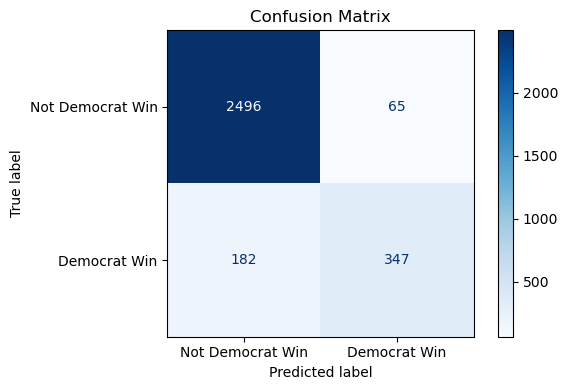


Classification Report:
                  precision    recall  f1-score   support

Not Democrat Win       0.93      0.97      0.95      2561
    Democrat Win       0.84      0.66      0.74       529

        accuracy                           0.92      3090
       macro avg       0.89      0.82      0.85      3090
    weighted avg       0.92      0.92      0.92      3090



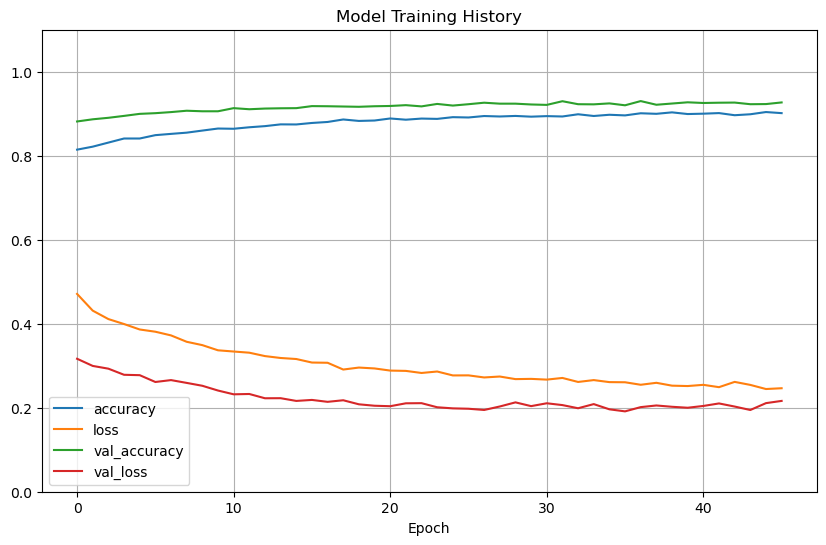

In [49]:
# Predict probabilities on the test set
y_pred_proba = model.predict(X_test_scaled)

# Convert probabilities to class labels using a 0.5 threshold
y_pred = (y_pred_proba > 0.5).astype(int).flatten() # flatten needed as output shape is (N, 1)

# Ensure y_test is also flat if it's not already (it should be a Series)
y_test_flat = y_test.values.flatten() # Convert Series to numpy array if needed

# Generate Confusion Matrix
cm = confusion_matrix(y_test_flat, y_pred)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

fig, ax = plt.subplots(figsize=(6, 4)) # Adjusted size for binary
disp.plot(ax=ax, cmap=plt.cm.Blues) # Removed xticks_rotation
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# Print Classification Report
print("\nClassification Report:")
# Ensure target_names matches the order [0, 1] -> ['Not Democrat Win', 'Democrat Win']
print(classification_report(y_test_flat, y_pred, target_names=class_names))

# Plot training history (optional)
pd.DataFrame(history.history).plot(figsize=(10, 6))
plt.grid(True)
plt.gca().set_ylim(0, max(1, max(history.history['loss']), max(history.history['val_loss'])) * 1.1) # Adjust y-axis limits
plt.title('Model Training History')
plt.xlabel('Epoch')
plt.show()


In [ ]:
#Notes:

# Don't need to worry about Test Loss 
# Change data to probability set
# # ignore the 2020 data to use for testing later
# Make a validation set rather than test and train set

#Adapt code from NOtebook 17 using 2 Years for training, third year for validation and fourth year for testing

#Make different models:

#Make linear regression: 
# Targets = Probability Dem win and Probability Rep win

#Logistic Regression
#Target = dem win, rep win

#NN
# with 1 hidden layer
# with 2 hidden layers

#When cleaing it up to present, Explain what the data is, give examples etc.

